# Analyze_e1b

Example for the MAXM05 course

(Sverker Werin)

In [0]:
!pip install accelerator-toolbox # only for Google Colab

import at
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 655kB 4.8MB/s 


Define the lattice elements.

In [0]:
# Straight Section definitions
D      =    at.elements.Drift('D', 1.5  );

# Quadrupoles 
QF     =    at.elements.Quadrupole('QF'  , 0.2, 0.750000);

Define the lattice.

In [0]:
L = [ D ]
L1 = 5*L
lattice =  [D,D,D, QF]+ L1 
print(lattice)

[Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Quadrupole('QF', 0.2, 0.75), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5)]


Define a particle X [x, xp, y ,yp, dp, s]

In [0]:
X0=np.zeros((6,1))
X0[0]=0.001 # x
X0[1]=0.0 # xp

Track through the lattice

In [0]:
# Find reference points for output. One for each element.
length = np.size(lattice)
refpts = np.r_[0:length + 1]

In [0]:
# Track the particle in X0 through the lattice.
X_out = at.lattice_pass(lattice, X0, nturns=1,refpts=refpts)

Get the longitudinal position of each element exit.

In [0]:
s = at.lattice.get_s_pos(lattice)

Plot the phase space along the lattice

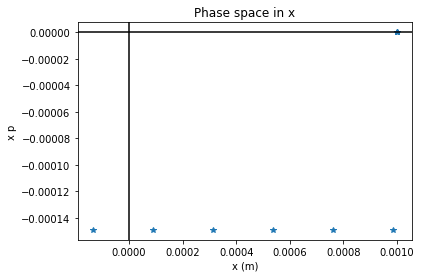

In [0]:
plt.plot(X_out[0,0,:,0],X_out[1,0,:,0],'*')
axes = plt.gca()
axes.axhline(y=0,color='k')
axes.axvline(x=0, color='k')
axes.set_xlabel('x (m)')
axes.set_ylabel('x p')
axes.set_title('Phase space in x')
plt.show()

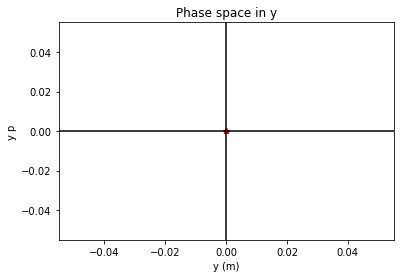

In [0]:
plt.plot(X_out[2,0,:,0],X_out[3,0,:,0],'*r')
axes = plt.gca()
axes.axhline(y=0,color='k')
axes.axvline(x=0, color='k')
axes.set_xlabel('y (m)')
axes.set_ylabel('y p')
axes.set_title('Phase space in y')
plt.show()